In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/포트폴리오 데이터 분석 실습/Stroke Prediction/data/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
for i in df.columns:
  missingValueRate = df[i].isna().sum() / len(df) * 100
  if missingValueRate > 0:
    print(f'{i} null rate: {round(missingValueRate, 2)}%')

bmi null rate: 3.93%


In [ ]:
# BMI null rate is less than 5%, however, BMI is considered as an important column which highly affects stroke. Therefore, it is ideal to replace the null values to median instead of dropping them.
# BMI median value could be different depending on the gender and age. The following code calculated the BMI median by grouping age and gender.

df['age_group'] = pd.cut(df['age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '20-40', '40-60', '60-80', '80-100'])
df['bmi'] = df.groupby(['gender', 'age_group'])['bmi'].transform(lambda x: x.fillna(x.median()))

df.head()

/tmp/ipython-input-270760444.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['bmi'] = df.groupby(['gender', 'age_group'])['bmi'].transform(lambda x: x.fillna(x.median()))


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,60-80
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.2,never smoked,1,60-80
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,60-80
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,40-60
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,60-80


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   int64   
 1   gender             5110 non-null   object  
 2   age                5110 non-null   float64 
 3   hypertension       5110 non-null   int64   
 4   heart_disease      5110 non-null   int64   
 5   ever_married       5110 non-null   object  
 6   work_type          5110 non-null   object  
 7   Residence_type     5110 non-null   object  
 8   avg_glucose_level  5110 non-null   float64 
 9   bmi                5110 non-null   float64 
 10  smoking_status     5110 non-null   object  
 11  stroke             5110 non-null   int64   
 12  age_group          5110 non-null   category
dtypes: category(1), float64(3), int64(4), object(5)
memory usage: 484.4+ KB


In [ ]:
df = df.drop(['id', 'ever_married'], axis=1)
df.head()

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,Male,67.0,0,1,Private,Urban,228.69,36.6,formerly smoked,1,60-80
1,Female,61.0,0,0,Self-employed,Rural,202.21,29.2,never smoked,1,60-80
2,Male,80.0,0,1,Private,Rural,105.92,32.5,never smoked,1,60-80
3,Female,49.0,0,0,Private,Urban,171.23,34.4,smokes,1,40-60
4,Female,79.0,1,0,Self-employed,Rural,174.12,24.0,never smoked,1,60-80


In [ ]:
df.nunique()

,0
gender,3
age,104
hypertension,2
heart_disease,2
work_type,5
Residence_type,2
avg_glucose_level,3979
bmi,418
smoking_status,4
stroke,2


In [ ]:
df['gender'].value_counts()

,count
gender,
Female,2994
Male,2115
Other,1


In [ ]:
df = df[df['gender'] != 'Other']
df['gender'].value_counts()

,count
gender,
Female,2994
Male,2115


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             5109 non-null   object  
 1   age                5109 non-null   float64 
 2   hypertension       5109 non-null   int64   
 3   heart_disease      5109 non-null   int64   
 4   work_type          5109 non-null   object  
 5   Residence_type     5109 non-null   object  
 6   avg_glucose_level  5109 non-null   float64 
 7   bmi                5109 non-null   float64 
 8   smoking_status     5109 non-null   object  
 9   stroke             5109 non-null   int64   
 10  age_group          5109 non-null   category
dtypes: category(1), float64(3), int64(3), object(4)
memory usage: 444.3+ KB


# **Tasks:**

1.   The age group of the patients who experienced the stroke the most.
2.   Does the residence type affect the stroke?
3. Ratio of stroke patients among each work type.
    - Is there any correlation between work type and smoking status?
4. Group by gender and age_group and calculate the mean BMI value.
5. Correlation between age, hypertension, heart_disease, avg_glucose_level, bmi.

# **The age of the patients who experienced the stroke the most**



In [ ]:
df_stroke = df.query('stroke == 1')
df_stroke.head()

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,Male,67.0,0,1,Private,Urban,228.69,36.6,formerly smoked,1,60-80
1,Female,61.0,0,0,Self-employed,Rural,202.21,29.2,never smoked,1,60-80
2,Male,80.0,0,1,Private,Rural,105.92,32.5,never smoked,1,60-80
3,Female,49.0,0,0,Private,Urban,171.23,34.4,smokes,1,40-60
4,Female,79.0,1,0,Self-employed,Rural,174.12,24.0,never smoked,1,60-80


In [ ]:
fig = px.histogram(df_stroke, x='age_group', category_orders={'age_group': ['0-20', '20-40', '40-60', '60-80', '80-100']},
                   labels={'age_group':'Age Group', 'count':'Count'}, title='The Age Group of the Stroke Occurrence', text_auto=True)
fig.show()

Age group between 60-80 has the most highest stroke occurrences.

It seems that greater the age, there is more higher risk of having stroke. However, it is hard to conclude that the age is a direct causality of the stroke.

# **Does the residence type affect the stroke?**

In [ ]:
stroke_residence = df_stroke['Residence_type'].value_counts().reset_index()
stroke_residence

,Residence_type,count
0,Urban,135
1,Rural,114


In [ ]:
stroke_residence = stroke_residence.set_index('Residence_type')
stroke_residence

,count
Residence_type,
Urban,135
Rural,114


In [ ]:
stroke_residence['ratio'] = round(stroke_residence['count'] / stroke_residence['count'].sum() * 100, 2)
stroke_residence

,count,ratio
Residence_type,,
Urban,135,54.22
Rural,114,45.78


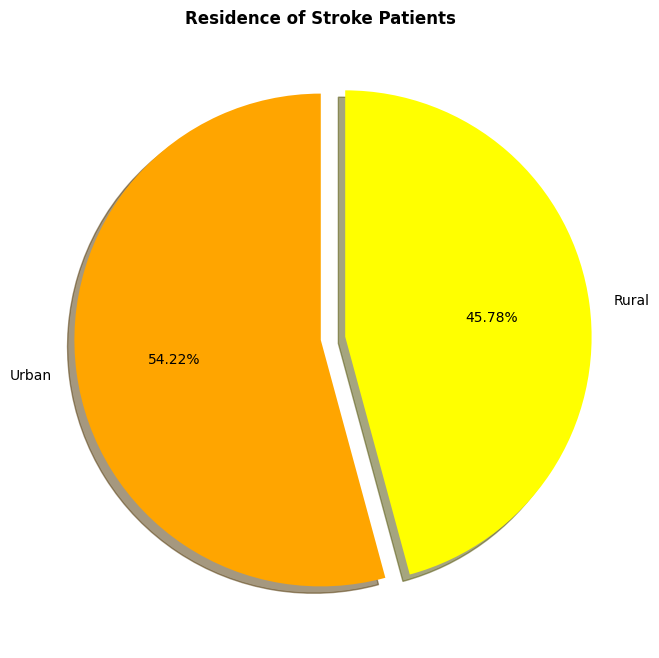

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(stroke_residence['ratio'], labels=stroke_residence.index, colors=['orange', 'yellow'], autopct='%0.2f%%', startangle=90, shadow=True, explode=(0, 0.1))
plt.title('Residence of Stroke Patients', fontweight='bold')
plt.show()

There are more stroke patients in urban. People who live in urban may be more exposed to the enviornment causing the stroke.

However, it is hard to conclude that residence type is the direct causality of the stroke.

# **Ratio of stroke patients among each work type**



In [ ]:
work_type = df.groupby('work_type')[['stroke']].value_counts().reset_index()
work_type

,work_type,stroke,count
0,Govt_job,0,624
1,Govt_job,1,33
2,Never_worked,0,22
3,Private,0,2775
4,Private,1,149
5,Self-employed,0,754
6,Self-employed,1,65
7,children,0,685
8,children,1,2


In [ ]:
work_type = pd.pivot_table(work_type, index='stroke', columns='work_type', values='count')
work_type

work_type,Govt_job,Never_worked,Private,Self-employed,children
stroke,,,,,
0,624.0,22.0,2775.0,754.0,685.0
1,33.0,NaN,149.0,65.0,2.0


In [ ]:
work_type = work_type.fillna(0).astype(int)
work_type

work_type,Govt_job,Never_worked,Private,Self-employed,children
stroke,,,,,
0,624,22,2775,754,685
1,33,0,149,65,2


In [ ]:
def add_ratio_and_total(work_type, label='Total'):

  col_sum = work_type.sum(numeric_only=True)
  ratio = round(work_type.div(col_sum) * 100, 2)
  total_raw = pd.Series([100]*len(work_type.columns), index=work_type.columns, name=label)

  return pd.concat([ratio, total_raw.to_frame().T])

In [ ]:
work_type_ratio = add_ratio_and_total(work_type)
work_type_ratio

work_type,Govt_job,Never_worked,Private,Self-employed,children
0,94.98,100.0,94.9,92.06,99.71
1,5.02,0.0,5.1,7.94,0.29
Total,100.00,100.0,100.0,100.00,100.00


In [ ]:
work_type_ratio.index.name = 'stroke'
work_type_ratio

work_type,Govt_job,Never_worked,Private,Self-employed,children
stroke,,,,,
0,94.98,100.0,94.9,92.06,99.71
1,5.02,0.0,5.1,7.94,0.29
Total,100.00,100.0,100.0,100.00,100.00


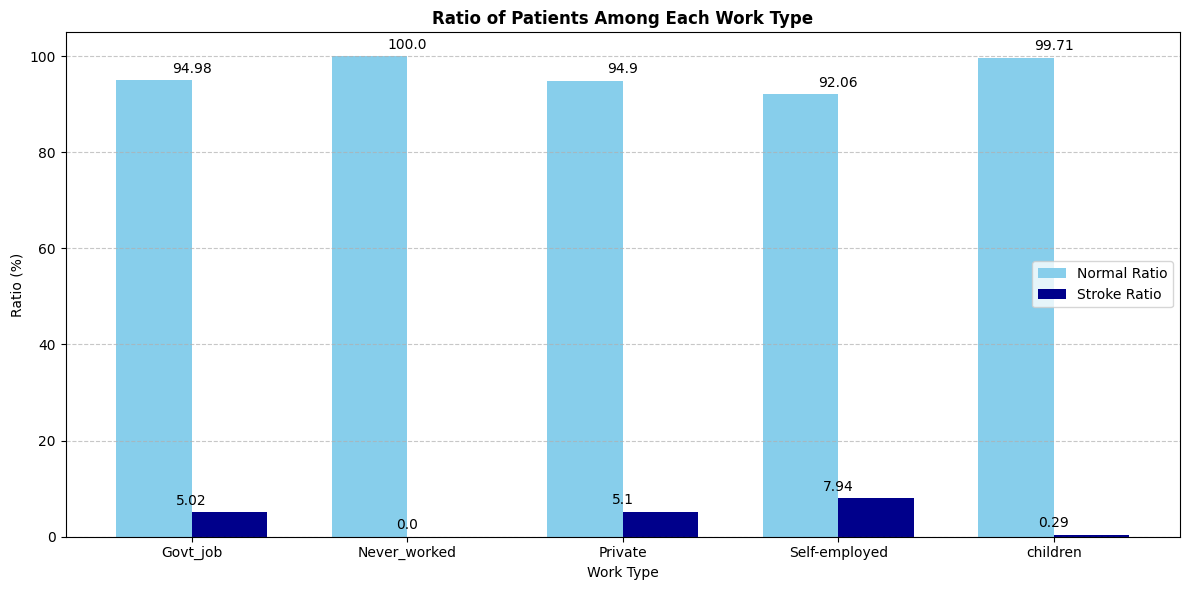

In [ ]:
work_type_ratio2 = work_type_ratio.iloc[:2]

work_types_c = work_type_ratio.columns
x = np.arange(len(work_types_c))

fig = plt.figure(figsize=(12, 6))
width = 0.35

plt.bar(x-width/2, work_type_ratio2.loc[0], label = 'Normal Ratio', color = 'skyblue', width = width)

for i, v in enumerate(work_type_ratio2.loc[0]):
  plt.text(i, v+1, str(v), ha='center', va='bottom')

plt.bar(x+width/2, work_type_ratio2.loc[1], label = 'Stroke Ratio', color = 'darkblue', width = width)

for i, v in enumerate(work_type_ratio2.loc[1]):
  plt.text(i, v+1, str(v), ha='center', va='bottom')

plt.title('Ratio of Patients Among Each Work Type', fontweight='bold')
plt.xlabel('Work Type')
plt.ylabel('Ratio (%)')
plt.xticks(x, work_types_c)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Overall, all work types showed a relatively low ratio of stroke occurrence. The results emphasize that stroke is not very common. Self-employed patients had the highest number of stroke cases among all work types. Children and individuals who never worked barely experienced stroke.

This leads us to the question: “*Does stress from work affect the likelihood of having a stroke?*”

## Is there any correlation between work type and smoking status?

If stress from work is one of the factors that cause stroke, there could be a correlation between work type and smoking status. Since self-employed patients have the highest number of stroke cases, their smoking ratio is expected to be high.

In [ ]:
job_smoke = df.groupby('work_type')[['smoking_status']].value_counts().reset_index()
job_smoke

,work_type,smoking_status,count
0,Govt_job,never smoked,282
1,Govt_job,formerly smoked,133
2,Govt_job,Unknown,122
3,Govt_job,smokes,120
4,Never_worked,never smoked,14
5,Never_worked,Unknown,8
6,Private,never smoked,1211
7,Private,Unknown,640
8,Private,smokes,543
9,Private,formerly smoked,530


In [ ]:
job_smoke_dict = {name: group for name, group in job_smoke.groupby('work_type')}

In [ ]:
job_smoke_dict['Govt_job']

,work_type,smoking_status,count
0,Govt_job,never smoked,282
1,Govt_job,formerly smoked,133
2,Govt_job,Unknown,122
3,Govt_job,smokes,120


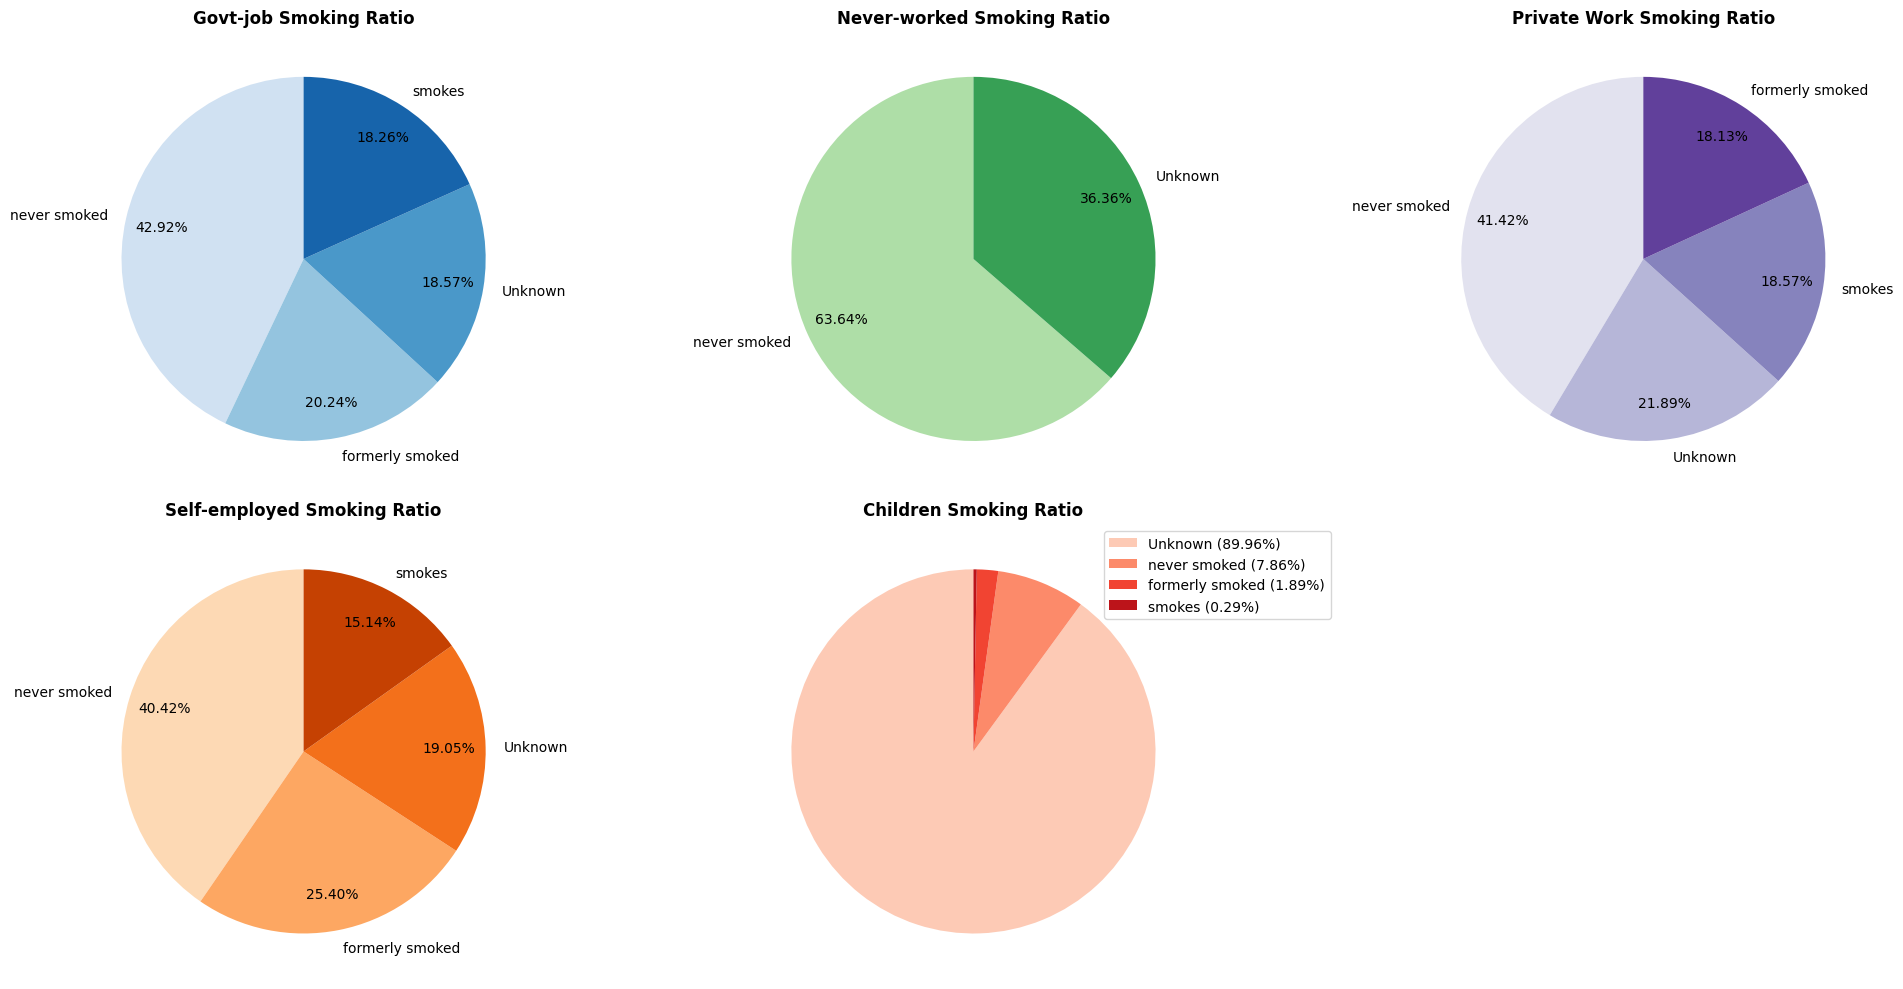

In [ ]:
gvt_smoke = job_smoke_dict['Govt_job']
nw_smoke = job_smoke_dict['Never_worked']
p_smoke = job_smoke_dict['Private']
se_smoke = job_smoke_dict['Self-employed']
c_smoke = job_smoke_dict['children']

fig = plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.title('Govt-job Smoking Ratio', fontweight='bold')
colors = sns.color_palette('Blues', n_colors=len(gvt_smoke))
plt.pie(gvt_smoke['count'], labels=gvt_smoke['smoking_status'], autopct='%0.2f%%', pctdistance=0.8, labeldistance=1.1, startangle=90, colors=colors)

plt.subplot(2, 3, 2)
plt.title('Never-worked Smoking Ratio', fontweight='bold')
colors = sns.color_palette('Greens', n_colors=len(nw_smoke))
plt.pie(nw_smoke['count'], labels=nw_smoke['smoking_status'], autopct='%0.2f%%', pctdistance=0.8, labeldistance=1.1, startangle=90, colors=colors)

plt.subplot(2, 3, 3)
plt.title('Private Work Smoking Ratio', fontweight='bold')
colors = sns.color_palette('Purples', n_colors=len(p_smoke))
plt.pie(p_smoke['count'], labels=p_smoke['smoking_status'], autopct='%0.2f%%', pctdistance=0.8, labeldistance=1.1, startangle=90, colors=colors)

plt.subplot(2, 3, 4)
plt.title('Self-employed Smoking Ratio', fontweight='bold')
colors = sns.color_palette('Oranges', n_colors=len(se_smoke))
plt.pie(se_smoke['count'], labels=se_smoke['smoking_status'], autopct='%0.2f%%', pctdistance=0.8, labeldistance=1.1, startangle=90, colors=colors)

plt.subplot(2, 3, 5)
plt.title('Children Smoking Ratio', fontweight='bold')
colors = sns.color_palette('Reds', n_colors=len(c_smoke))
percent = (c_smoke['count'] / c_smoke['count'].sum() * 100).round(2)
plt.pie(c_smoke['count'], startangle=90, colors=colors)
labels_with_pct = [f'{label} ({p}%)' for label, p in zip(c_smoke['smoking_status'], percent)]
plt.legend(labels_with_pct, loc='upper right', bbox_to_anchor=(1.3, 1))

plt.tight_layout()
plt.show()

The pie charts summarize the ratio of smokers and non-smokers among patients in each work type. For our analysis, patients categorized as “formerly smoked” and “smokes” are grouped together as smokers. Among all work types, as expected, self-employed patients showed the highest ratio of smokers at approximately 40.54%, followed by government workers (38.5%) and private sector workers (36.7%).

These results suggest that smoking habits may be related to the occurrence of stroke.

# **Group by gender and age group and calculate the average BMI value**

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,Male,67.0,0,1,Private,Urban,228.69,36.6,formerly smoked,1,60-80
1,Female,61.0,0,0,Self-employed,Rural,202.21,29.2,never smoked,1,60-80
2,Male,80.0,0,1,Private,Rural,105.92,32.5,never smoked,1,60-80
3,Female,49.0,0,0,Private,Urban,171.23,34.4,smokes,1,40-60
4,Female,79.0,1,0,Self-employed,Rural,174.12,24.0,never smoked,1,60-80


In [ ]:
df_bmi = df.groupby(['gender', 'age_group'])[['bmi']].mean().rename(columns={'bmi':'average_bmi'}).reset_index()
df_bmi

/tmp/ipython-input-3380446071.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,gender,age_group,average_bmi
0,Female,0-20,22.389961
1,Female,20-40,29.954307
2,Female,40-60,31.392341
3,Female,60-80,29.923478
4,Female,80-100,28.094366
5,Male,0-20,21.942406
6,Male,20-40,29.973381
7,Male,40-60,31.954784
8,Male,60-80,30.138956
9,Male,80-100,27.813333


In [ ]:
female = df_bmi.query('gender == "Female"')
male = df_bmi.query('gender == "Male"')

print(female)
print(male)

   gender age_group  average_bmi
0  Female      0-20    22.389961
1  Female     20-40    29.954307
2  Female     40-60    31.392341
3  Female     60-80    29.923478
4  Female    80-100    28.094366
  gender age_group  average_bmi
5   Male      0-20    21.942406
6   Male     20-40    29.973381
7   Male     40-60    31.954784
8   Male     60-80    30.138956
9   Male    80-100    27.813333


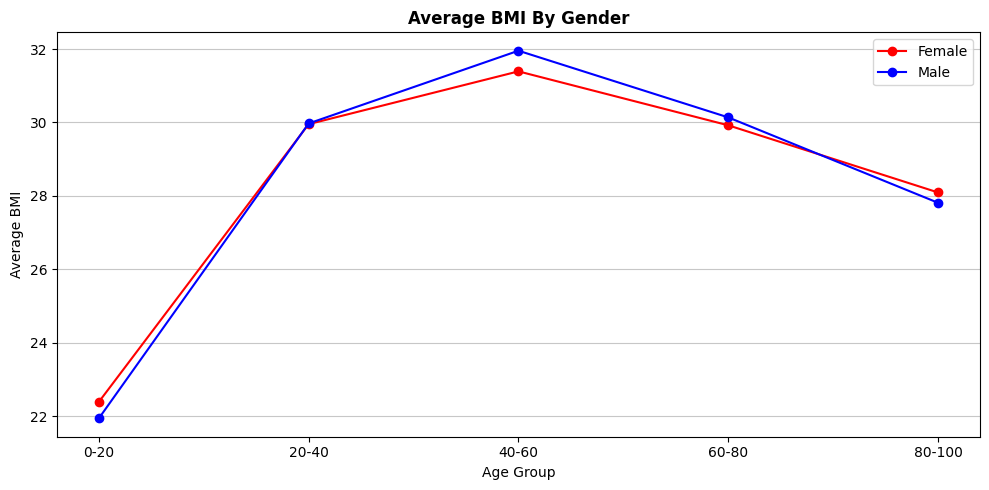

In [ ]:
fig = plt.figure(figsize=(10, 5))

plt.plot(female['age_group'], female['average_bmi'], marker='o', label='Female', color='red')
plt.plot(male['age_group'], male['average_bmi'], marker='o', label='Male', color='blue')

plt.xlabel('Age Group')
plt.ylabel('Average BMI')
plt.title('Average BMI By Gender', fontweight='bold')
plt.legend(loc='upper right'),
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()

plt.show()

The line graph shows that age group between 40-60 shows the highest BMI value for both gender. As the age increases, the BMI value increases together then gradually declines from age 60.

In [ ]:
df_female = df.query('gender == "Female"')
df_male = df.query('gender == "Male"')

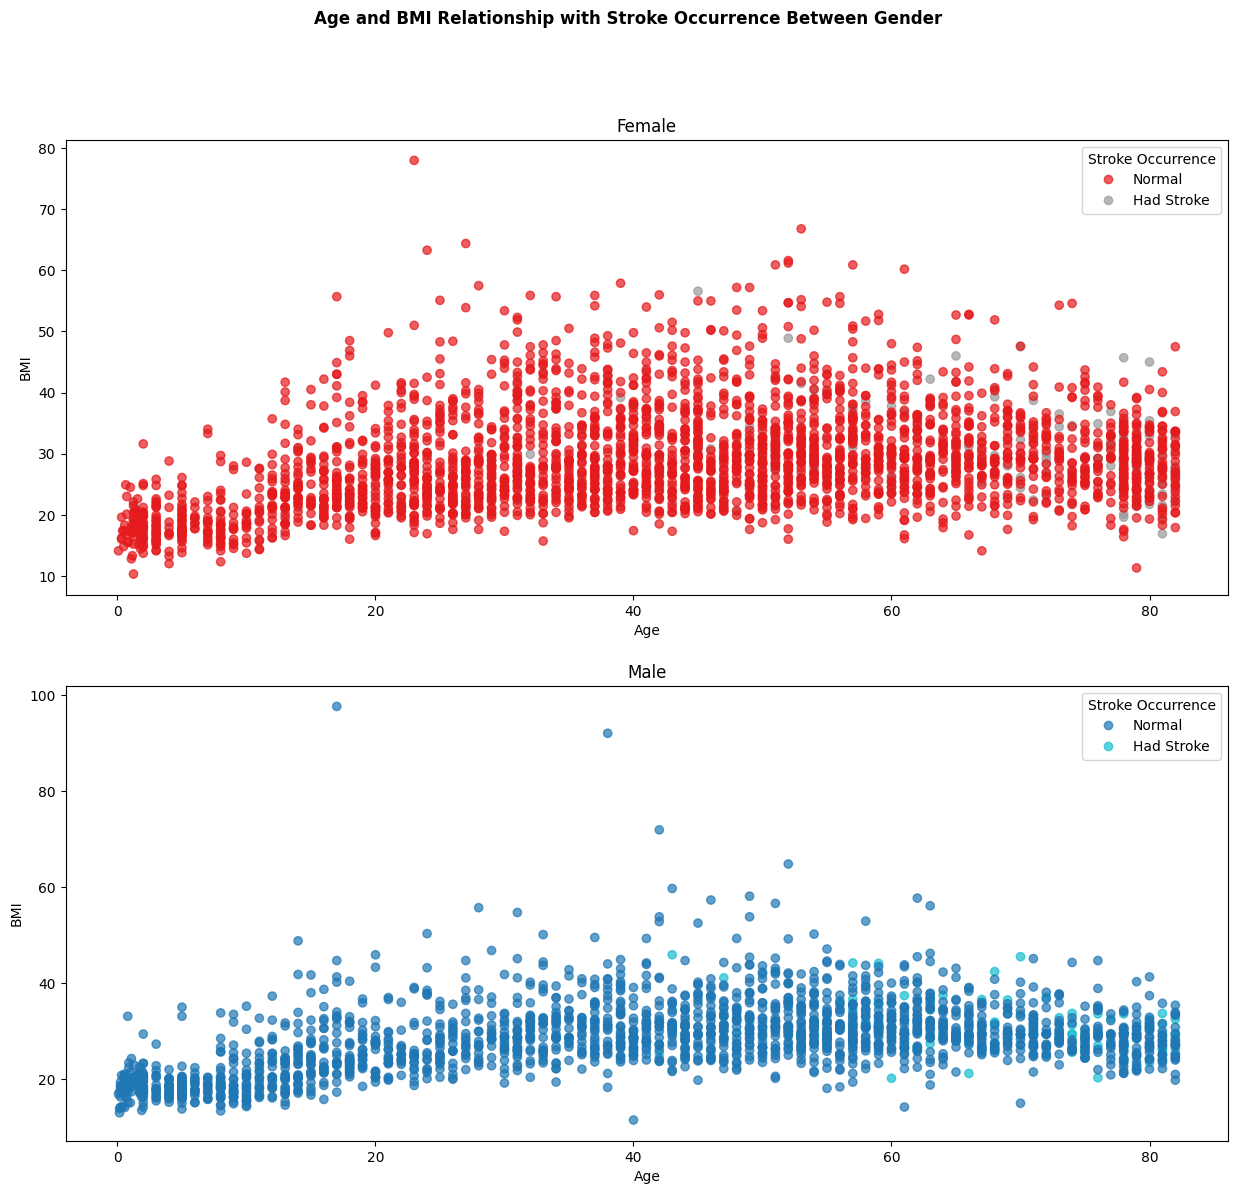

In [ ]:
fig = plt.figure(figsize=(15, 13))

plt.subplot(2, 1, 1)
scatter = plt.scatter(data=df_female, x='age', y='bmi', c=df_female['stroke'], cmap='Set1', alpha=0.7)
plt.title('Female')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(handles=scatter.legend_elements()[0], title='Stroke Occurrence', labels=['Normal', 'Had Stroke'], loc='upper right')

plt.subplot(2, 1, 2)
scatter = plt.scatter(data=df_male, x='age', y='bmi', c=df_male['stroke'], cmap='tab10', alpha=0.7)
plt.title('Male')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(handles=scatter.legend_elements()[0], title='Stroke Occurrence', labels=['Normal', 'Had Stroke'], loc='upper right')


plt.suptitle('Age and BMI Relationship with Stroke Occurrence Between Gender', fontweight='bold')

plt.show()

According to the scatter plots, both females and males show the highest stroke occurrence in the 60–80 age group. Since these patients have already experienced a stroke, this suggests that many of them likely had their stroke before reaching the age of 60–80. Therefore, individuals in the 40–60 age group may be at a higher risk of experiencing a stroke.

Females show a wider range of BMI values and a higher stroke occurrence than males. Female patients who experienced stroke tend to have a BMI above the average for their age group. In contrast, males show a more stable range of BMI values, and their stroke occurrence is lower than that of females. Male patients who had stroke also tend to have slightly higher BMI values than the average for their age group, but the difference is not as large as it is for females.

Overall, it appears that females aged 40 and above have a higher risk of stroke compared to males.

# **Correlation between age, hypertension, heart disease, average glucose level, BMI**

In [ ]:
df_corr = df[['age', 'avg_glucose_level', 'bmi']].corr()
df_corr

,age,avg_glucose_level,bmi
age,1.000000,0.238323,0.334610
avg_glucose_level,0.238323,1.000000,0.171005
bmi,0.334610,0.171005,1.000000


In [ ]:
fig = px.imshow(df_corr, text_auto='.2f', color_continuous_scale='Viridis')
fig.show()

As age increases, both the average glucose level and BMI also increase. This indicates a positive correlation between them.

In [ ]:
df_heart = df.groupby('age_group')[['heart_disease']].value_counts().reset_index()
df_heart

/tmp/ipython-input-2684163402.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,age_group,heart_disease,count
0,0-20,0,1024
1,0-20,1,1
2,20-40,0,1216
3,20-40,1,2
4,40-60,0,1499
5,40-60,1,63
6,60-80,0,1005
7,60-80,1,183
8,80-100,0,89
9,80-100,1,27


In [ ]:
df_heart = pd.pivot_table(df_heart, index='heart_disease', columns='age_group', values='count')
df_heart

/tmp/ipython-input-3048390432.py:1: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



age_group,0-20,20-40,40-60,60-80,80-100
heart_disease,,,,,
0,1024.0,1216.0,1499.0,1005.0,89.0
1,1.0,2.0,63.0,183.0,27.0


In [ ]:
def add_ratio_and_total1(df_heart, label='Total'):

  col_sum = df_heart.sum(numeric_only=True)
  ratio = round(df_heart.div(col_sum) * 100, 2)
  total_raw = pd.Series([100]*len(df_heart.columns), index=df_heart.columns, name=label)

  return pd.concat([ratio, total_raw.to_frame().T])

df_heart_ratio = add_ratio_and_total1(df_heart)
df_heart_ratio

age_group,0-20,20-40,40-60,60-80,80-100
0,99.9,99.84,95.97,84.6,76.72
1,0.1,0.16,4.03,15.4,23.28
Total,100.0,100.00,100.00,100.0,100.00


In [ ]:
df_heart_ratio.index.name = 'heart_disease'
df_heart_ratio

age_group,0-20,20-40,40-60,60-80,80-100
heart_disease,,,,,
0,99.9,99.84,95.97,84.6,76.72
1,0.1,0.16,4.03,15.4,23.28
Total,100.0,100.00,100.00,100.0,100.00


In [ ]:
df_hypertension = df.groupby('age_group')['hypertension'].value_counts().reset_index()
df_hypertension

/tmp/ipython-input-1552762450.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,age_group,hypertension,count
0,0-20,0,1023
1,0-20,1,2
2,20-40,0,1178
3,20-40,1,40
4,40-60,0,1388
5,40-60,1,174
6,60-80,0,935
7,60-80,1,253
8,80-100,0,87
9,80-100,1,29


In [ ]:
df_hypertension = pd.pivot_table(df_hypertension, index='hypertension', columns='age_group', values='count')
df_hypertension

/tmp/ipython-input-3531407968.py:1: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



age_group,0-20,20-40,40-60,60-80,80-100
hypertension,,,,,
0,1023.0,1178.0,1388.0,935.0,87.0
1,2.0,40.0,174.0,253.0,29.0


In [ ]:
def add_ratio_and_total2(df_hypertension, label='Total'):

  col_sum = df_hypertension.sum(numeric_only=True)
  ratio = round(df_hypertension.div(col_sum) * 100, 2)
  total_raw = pd.Series([100] * len(df_hypertension.columns), index=df_hypertension.columns, name=label)

  return pd.concat([ratio, total_raw.to_frame().T])

df_hypertension_ratio = add_ratio_and_total2(df_hypertension)
df_hypertension_ratio.index.name = 'hypertension'
df_hypertension_ratio

age_group,0-20,20-40,40-60,60-80,80-100
hypertension,,,,,
0,99.8,96.72,88.86,78.7,75.0
1,0.2,3.28,11.14,21.3,25.0
Total,100.0,100.00,100.00,100.0,100.0


In [ ]:
df_heart_ratio

age_group,0-20,20-40,40-60,60-80,80-100
heart_disease,,,,,
0,99.9,99.84,95.97,84.6,76.72
1,0.1,0.16,4.03,15.4,23.28
Total,100.0,100.00,100.00,100.0,100.00


In [ ]:
df_hypertension_ratio

age_group,0-20,20-40,40-60,60-80,80-100
hypertension,,,,,
0,99.8,96.72,88.86,78.7,75.0
1,0.2,3.28,11.14,21.3,25.0
Total,100.0,100.00,100.00,100.0,100.0


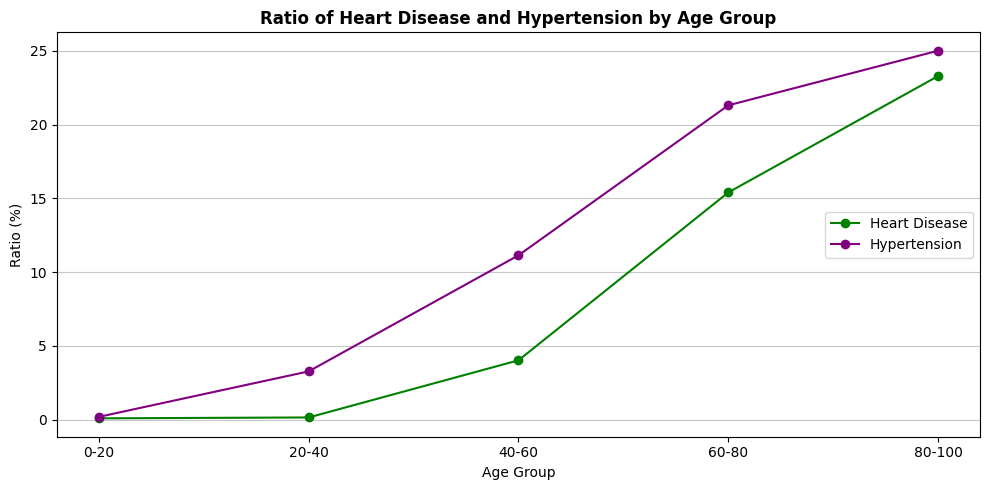

In [ ]:
heart_ratio = df_heart_ratio.loc[1]
hypertension_ratio = df_hypertension_ratio.loc[1]

fig = plt.figure(figsize=(10,5))

plt.plot(heart_ratio.index, heart_ratio.values, label='Heart Disease', marker='o', color='green')
plt.plot(hypertension_ratio.index, hypertension_ratio.values, label='Hypertension', marker='o', color='purple')

plt.xlabel('Age Group')
plt.ylabel('Ratio (%)')
plt.title('Ratio of Heart Disease and Hypertension by Age Group', fontweight='bold')
plt.grid(axis='y', alpha=0.7)
plt.legend(loc='center right')
plt.tight_layout()

plt.show()

The graph shows a clear upward trend in both heart disease and hypertension ratios as the age group increases. This indicates that heart disease and hypertension also have a positive correlation with age.

# **Summary**

## 1. The age of the patients who experienced the stroke the most.
- Age group between 60-80 has the most highest stroke occurrences.

## 2. Does the residence type affect the stroke?
- There are more stroke patients in urban.

## 3. Ratio of stroke patients among each work type.
- Stroke is not very common. Self-employed patients had the highest number of stroke cases among all work types.
- Stress from work could lead to smoking habit. Self-employed patients have the highest smoking ratio and this may be related to the occurrence of stroke.

## 4. Group by gender and age group and calculate the average BMI value
- Age group between 40-60 shows the highest BMI value for both gender.
- Individuals in the 40–60 age group is predicted to be at a higher risk of experiencing a stroke based on the data from age group 60-80 patients.
- Females aged 40 and above have a higher risk of stroke compared to males.

## 5. Correlation between age, hypertension, heart disease, average glucose level, BMI
- As age increases, both the average glucose level and BMI also increase. This indicates a positive correlation between them.
- Heart disease and hypertension also have a positive correlation with age.